### Classifier using three timesteps - planet neighbors determined by semi-major axis values
#### rows 0-2, ~27.4 years

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
planets = pd.read_csv('3ts semi.csv', skipinitialspace=True)
print(planets.columns)

Index(['run', 'planet', 'initiale', 'final e', 'mean e', 'min e', 'max e',
       'sd e', 'initialpericenter', 'final pericenter', 'mean pericenter',
       'min pericenter', 'max pericenter', 'sd pericenter', 'initialjacobi',
       'final jacobi', 'mean jacobi', 'min jacobi', 'max jacobi', 'sd jacobi',
       'initialmhr1', 'final mhr1', 'mean mhr1', 'min mhr1', 'max mhr1',
       'sd mhr1', 'initialmhr2', 'final mhr2', 'mean mhr2', 'min mhr2',
       'max mhr2', 'sd mhr2', 'initiala1_ratio', 'final a1_ratio',
       'mean a1_ratio', 'min a1_ratio', 'max a1_ratio', 'sd a1_ratio',
       'initiala2_ratio', 'final a2_ratio', 'mean a2_ratio', 'min a2_ratio',
       'max a2_ratio', 'sd a2_ratio', 'initialmass1_ratio',
       'final mass1_ratio', 'mean mass1_ratio', 'min mass1_ratio',
       'max mass1_ratio', 'sd mass1_ratio', 'initialmass2_ratio',
       'final mass2_ratio', 'mean mass2_ratio', 'min mass2_ratio',
       'max mass2_ratio', 'sd mass2_ratio', 'end time', 'fate'],
      dty

###### Classifies as type of instability (ejection, remaining, planet-planet collision, central body collision).

In [ ]:
fates = list(set(planets['fate']))
types = {fates[i] : i for i in range(len(fates))}
int_dict = {i : fates[i] for i in range(len(fates))}
classes = planets['fate'].map(types)

###### Classifies as either stable or unstable.
> Is currently ~82.5% accurate

Second cell is the hard coded version

In [ ]:
fates = np.sort(list(set(planets['fate']))) [::-1]

types = {fates[i] : i for i in range(len(fates))}

classes = planets['fate'].map(types)

for i in range(len(classes)):
    if classes[i] == 0:
        pass
    else:
        classes[i] = 1

In [3]:
fates = list(set(planets['fate']))

types = {fates[i] : i for i in range(len(fates))}

classes = []

for i in range(len(planets['fate'])):
    if planets['fate'][i] == "remaining":
        classes += [0]
    else:
        classes += [1]
        
classes = np.array(classes)

###### Training

In [4]:
features_train, features_test, classes_train, classes_test = train_test_split(planets, classes, test_size=0.3, random_state=7)

ids_train = features_train['planet'].to_numpy()
features_train.drop(['run', 'planet', 'fate', 'end time'], axis=1, inplace=True)

cols = features_train.columns
features_train = features_train.to_numpy()

ids_test = features_test['planet'].to_numpy()
features_test.drop(['run', 'planet', 'fate', 'end time'], axis=1, inplace=True)
features_test = features_test.to_numpy()

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
classifier = GradientBoostingClassifier(random_state=7)
classifier.fit(features_train, classes_train)

GradientBoostingClassifier(random_state=7)

In [6]:
classes_predict = classifier.predict( features_test )
print('Classifier is ', accuracy_score(classes_test, classes_predict) * 100, '% accurate on testing set' )

Classifier is  82.33333333333334 % accurate on testing set


###### Feature importance

In [7]:
feats=classifier.feature_importances_
inds=np.argsort(feats)[::-1]

for i in range(len(inds)):
    print(cols[inds[i]], feats[inds[i]])

min mass1_ratio 0.12780153191118057
sd e 0.120124215634875
min mass2_ratio 0.07153991897006703
initialjacobi 0.059298717842325266
sd pericenter 0.049791776404937614
min jacobi 0.0491432786813691
mean mass2_ratio 0.04770694664865672
min a2_ratio 0.03573452508517058
initiala1_ratio 0.030266477926683313
mean a2_ratio 0.030244776707351675
max e 0.02393549880570311
mean mass1_ratio 0.022872393185831376
initiala2_ratio 0.021251574997633246
min a1_ratio 0.020577658378923766
final mass1_ratio 0.017596685759586592
sd a1_ratio 0.015836550673166593
mean mhr2 0.015394629792064749
max mass2_ratio 0.014966388797222063
final a1_ratio 0.013964666040499358
max a1_ratio 0.013677302134050873
final mass2_ratio 0.012763754280123241
sd mhr2 0.01175793907992453
min pericenter 0.011629756240814148
max mass1_ratio 0.010789838465395237
mean a1_ratio 0.010646592862878546
max mhr1 0.010310342983338968
sd mass1_ratio 0.009367625684461556
sd a2_ratio 0.007943792925523333
min e 0.007867089990681598
final e 0.0076858

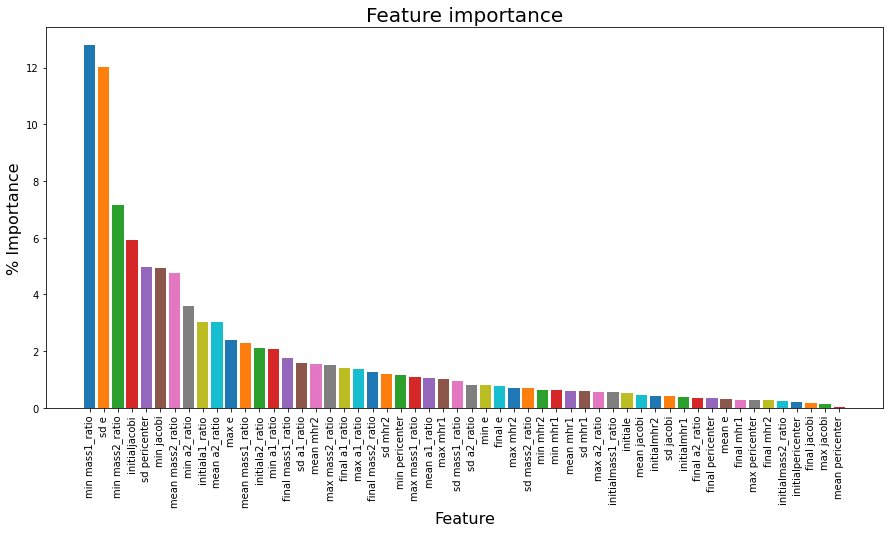

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pylab


f=plt.figure(figsize=(15,7))

for i in range(len(inds)):
    plt.bar(cols[inds[i]], feats[inds[i]] * 100)
    

 
plt.ylabel('% Importance', size=16)
plt.xlabel('Feature', size=16)
plt.title('Feature importance', size=20)
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'min mass 1 vs sd e')

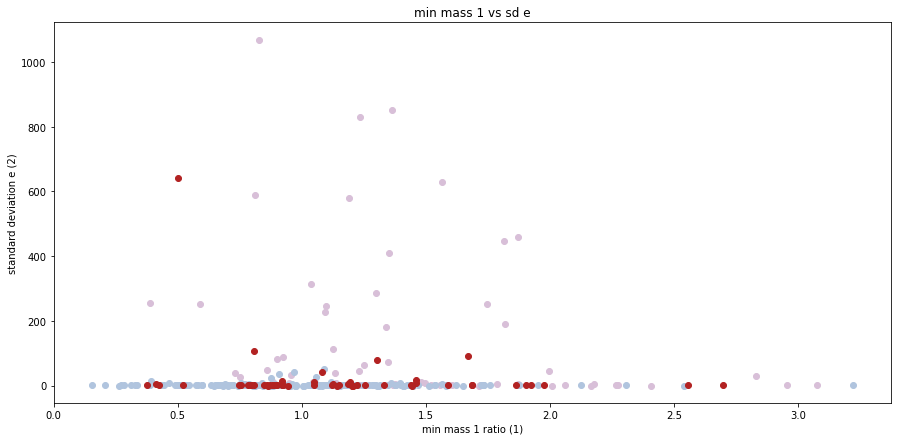

In [9]:
stable_x = []
unstable_x = []
misclassified_x = []
stable_y = []
unstable_y = []
misclassified_y = []
    
    
f=plt.figure(figsize=(15,7))

for i in range(len(features_test)):
    if (classes_test[i] == 0 and classes_predict[i] == 0):
        stable_y.append(features_test[i][45])
        stable_x.append(features_test[i][36])
    elif (classes_test[i] == 1 and classes_predict[i] == 1):
        unstable_y.append(features_test[i][45])
        unstable_x.append(features_test[i][36])
    else:
        misclassified_y.append(features_test[i][45])
        misclassified_x.append(features_test[i][36])

        
plt.scatter(stable_x, stable_y, color = 'thistle')
plt.scatter(misclassified_x, misclassified_y, color = 'firebrick', zorder = 2)
plt.scatter(unstable_x, unstable_y, color = 'lightsteelblue')

        
plt.xlabel('min mass 1 ratio (1)')
plt.ylabel('standard deviation e (2)')
plt.title('min mass 1 vs sd e')